In [38]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

df = pd.read_excel(r'C:\Users\nikhi\ML Lab 3-1\ML Datasets\colors.xlsx')
dfs = pd.read_excel(r'C:\Users\nikhi\Downloads\types.xlsx')


vectorizer_color = CountVectorizer()
x = df['color']
y = df['match']
x_vectorized = vectorizer_color.fit_transform(x)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_vectorized, y)


vectorizer_type = CountVectorizer()
x1 = dfs['type']
y1 = dfs['typematch']
x1_vectorized = vectorizer_type.fit_transform(x1)
knn_model2 = KNeighborsClassifier(n_neighbors=3)
knn_model2.fit(x1_vectorized, y1)


KNeighborsClassifier(n_neighbors=3)

In [48]:

def predict(user_color):
    ipvector = vectorizer_color.transform([user_color])
    neighbors = knn_model.kneighbors(ipvector, return_distance=False)
    predictions = [y.iloc[i] for i in neighbors[0]]
    return predictions


def predict_type(utype):
    iptvector = vectorizer_type.transform([utype])
    neighborst = knn_model2.kneighbors(iptvector, return_distance=False)
    type_predictions = [y1.iloc[i] for i in neighborst[0]]
    return type_predictions


ucolor = input("Enter a color: ")
predicted_matches = predict(ucolor)

utype = input("Enter a type: ")
predicted_type_matches = predict_type(utype)

print(f"The matching colors for '{ucolor}' are:")
for i in predicted_matches:
    print(i)

print(f"The matching type for '{utype}' are:")
for i in predicted_type_matches:
    print(i)




Enter a color: red
Enter a type: crop-top
The matching colors for 'red' are:
green
yellow
blue
The matching type for 'crop-top' are:
baggy-jeans
cargos
skirt


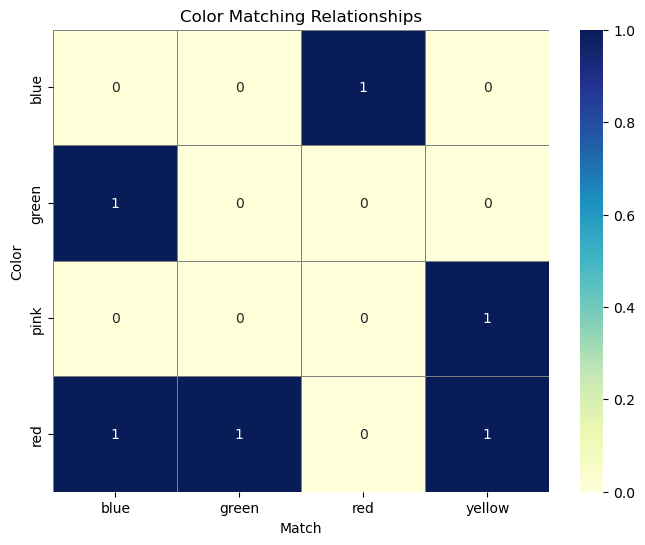

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
crosstab = pd.crosstab(df['color'], df['match'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, cmap="YlGnBu", cbar=True, linewidths=0.5, linecolor="gray")
plt.title("Color Matching Relationships")
plt.xlabel("Match")
plt.ylabel("Color")

plt.show()


Text(70.72222222222221, 0.5, 'Type')

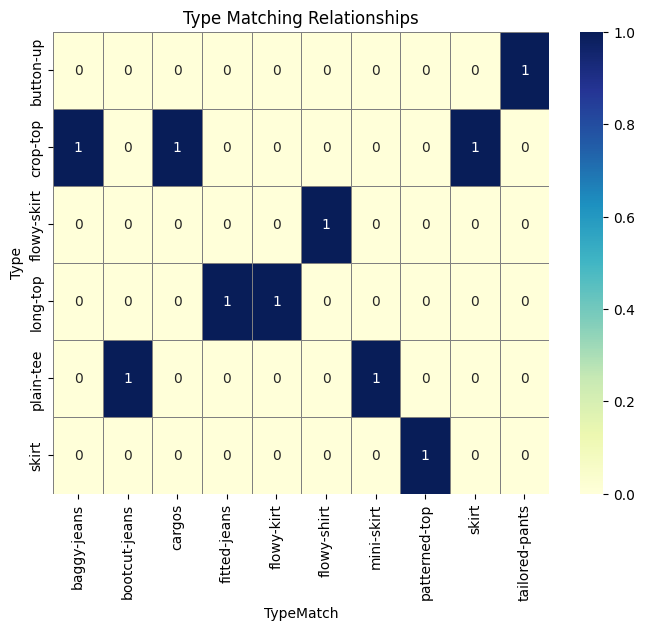

In [14]:
type_crosstab = pd.crosstab(dfs['type'],dfs['typematch'])


plt.figure(figsize=(8, 6))
sns.heatmap(type_crosstab, annot=True, cmap="YlGnBu", cbar=True, linewidths=0.5, linecolor="gray")
plt.title("Type Matching Relationships")
plt.xlabel("TypeMatch")
plt.ylabel("Type")

0.0
